<div id="container" style="position:relative;">
<div style="float:left"><h1>  Capstone Projects NLP - William Nankap </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

# NLP ClassifyChat

An innovative text classification project based on natural language processing. It leverages conversations from the freeCodeCamp chat to provide an accurate and efficient solution for automatically categorizing messages and extracting relevant information from large volumes of textual data.

### **`Notebook 6: Tensorflow + BERT¶`**

### **`Author: William Nankap`**

Work plan: https://docs.google.com/presentation/d/10xtITocBaQgZYtDw1yWe_FzQPgR7Je6EkNRv8IJVCPM/edit?usp=sharing


-----

# Table of Contents

- ### Introduction
- ### 1. Tensorflow
- ### 2. BERT
- ### Conclusion

-----

# Introduction

Welcome to this notebook dedicated to the use of TensorFlow and BERT! In this analysis, we'll be focusing on two powerful tools for exploring textual data: TensorFlow and BERT (Bidirectional Encoder Representations from Transformers).

TensorFlow will enable us to visualize the data produced by the Word2Vec model. Using Word2Vec, we can create vector representations of words that capture semantic and contextual similarities. By examining these vectors, we can explore relationships between words and discover interesting patterns in our text corpus.

On the other hand, we'll use BERT to deepen our understanding of word patterns in our corpus. BERT is a pre-trained language model based on the Transformer architecture. It is capable of capturing complex relationships between words and performing tasks such as text classification and sequence generation. By applying BERT to our corpus, we will be able to obtain additional information on word relations and sentence structures.

By combining the use of TensorFlow and BERT, we hope to explore and analyze in depth the features and patterns of our text corpus. This will enable us to better understand the meaning and context of the words used, as well as extract useful information for various applications such as sentiment analysis, content recommendation, and much more. Get ready to dive into the exciting exploration of our text corpus with TensorFlow and BERT!

In [5]:
import tensorflow as tf
from gensim.models import Word2Vec
from tensorboard.plugins import projector
from transformers import TFBertModel, BertTokenizer

import pandas as pd
import numpy as np

from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups


# from tensorflow.contrib.tensorboard.plugins import projecto
tf.__version__

'2.11.1'

# 1. Tensorflow

In this notebook, we have a function that utilizes TensorFlow for embedding visualization. The function takes a pre-trained Word2Vec model and generates embeddings for words. These embeddings are then saved and exported for visualization using TensorBoard, a powerful visualization tool provided by TensorFlow. By utilizing this function, we can gain a deeper understanding of the relationships and similarities between words in our corpus. The embeddings can provide valuable insights into the semantic meaning and context of words, allowing us to explore trends and patterns within our text data. With the visualizations provided by TensorBoard, we can easily navigate and interpret the embeddings, further enhancing our understanding of the underlying text data.

In [4]:
# Data pre-processing
# Make sure you have your Word2Vec template trained

# Chemin vers le dossier de sauvegarde pour TensorBoard
log_dir = "TensorBoard_Docs"

# Saving word vectors
model = Word2Vec.load("Word2Vec.model")
weights = model.wv.vectors
words = model.wv.index_to_key

# Creation of a TensorFlow object for word embeddings
with tf.compat.v1.Session() as sess:
    
    # Placeholder for word embeddings
    embedding_var = tf.Variable(weights, name='word_embeddings')
    sess.run(tf.compat.v1.global_variables_initializer())

    # Save embeddings to a TSV file
    metadata_file = "metadata.tsv"
    with open(metadata_file, 'w', encoding='utf-8') as f:
        for word in words:
            f.write(word + '\n')

    # Configure TensorBoard projector
    config = projector.ProjectorConfig()
    embedding = config.embeddings.add()
    embedding.tensor_name = embedding_var.name
    embedding.metadata_path = metadata_file

    # Save model for TensorBoard
    summary_writer = tf.compat.v1.summary.FileWriter(log_dir)
    projector.visualize_embeddings(summary_writer, config)

    # Run TensorFlow session to export embeddings
    sess.run(tf.compat.v1.variables_initializer([embedding_var]))
    saver = tf.compat.v1.train.Saver()
    saver.save(sess, log_dir + '/model.ckpt')

print("Embeddings have been successfully exported. You can now run TensorBoard.")


Embeddings have been successfully exported. You can now run TensorBoard.


2023-06-26 06:46:56.233949: W tensorflow/c/c_api.cc:291] Operation '{name:'word_embeddings_2/Assign' id:47 op device:{requested: '', assigned: ''} def:{{{node word_embeddings_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](word_embeddings_2, word_embeddings_2/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


- `Run this command on your terminal: tensorboard --logdir TensorBoard_Docs/`
- And then connect on your browser at `http://localhost:6006/`

You will get something like this:

- You tape a word in the search, and you can see any similary word associated.

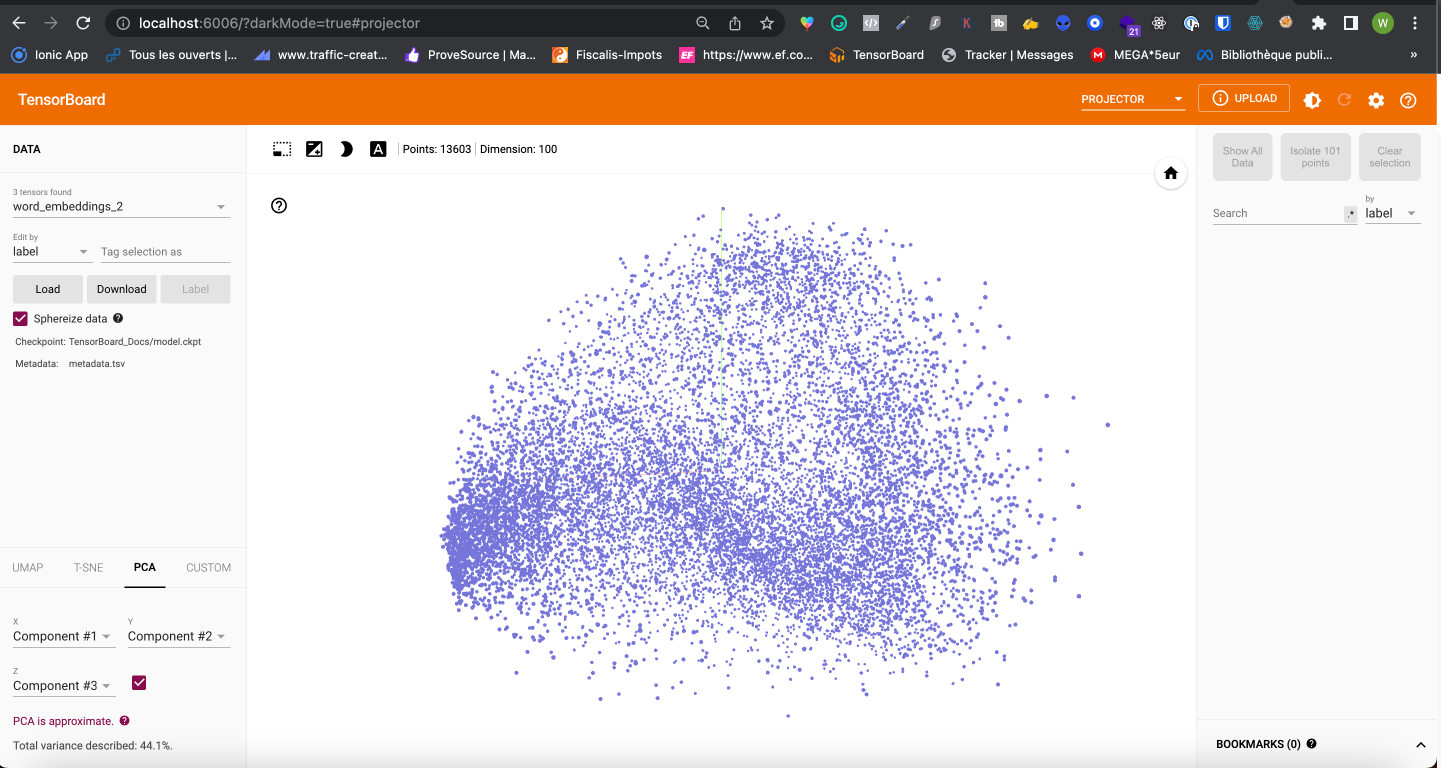

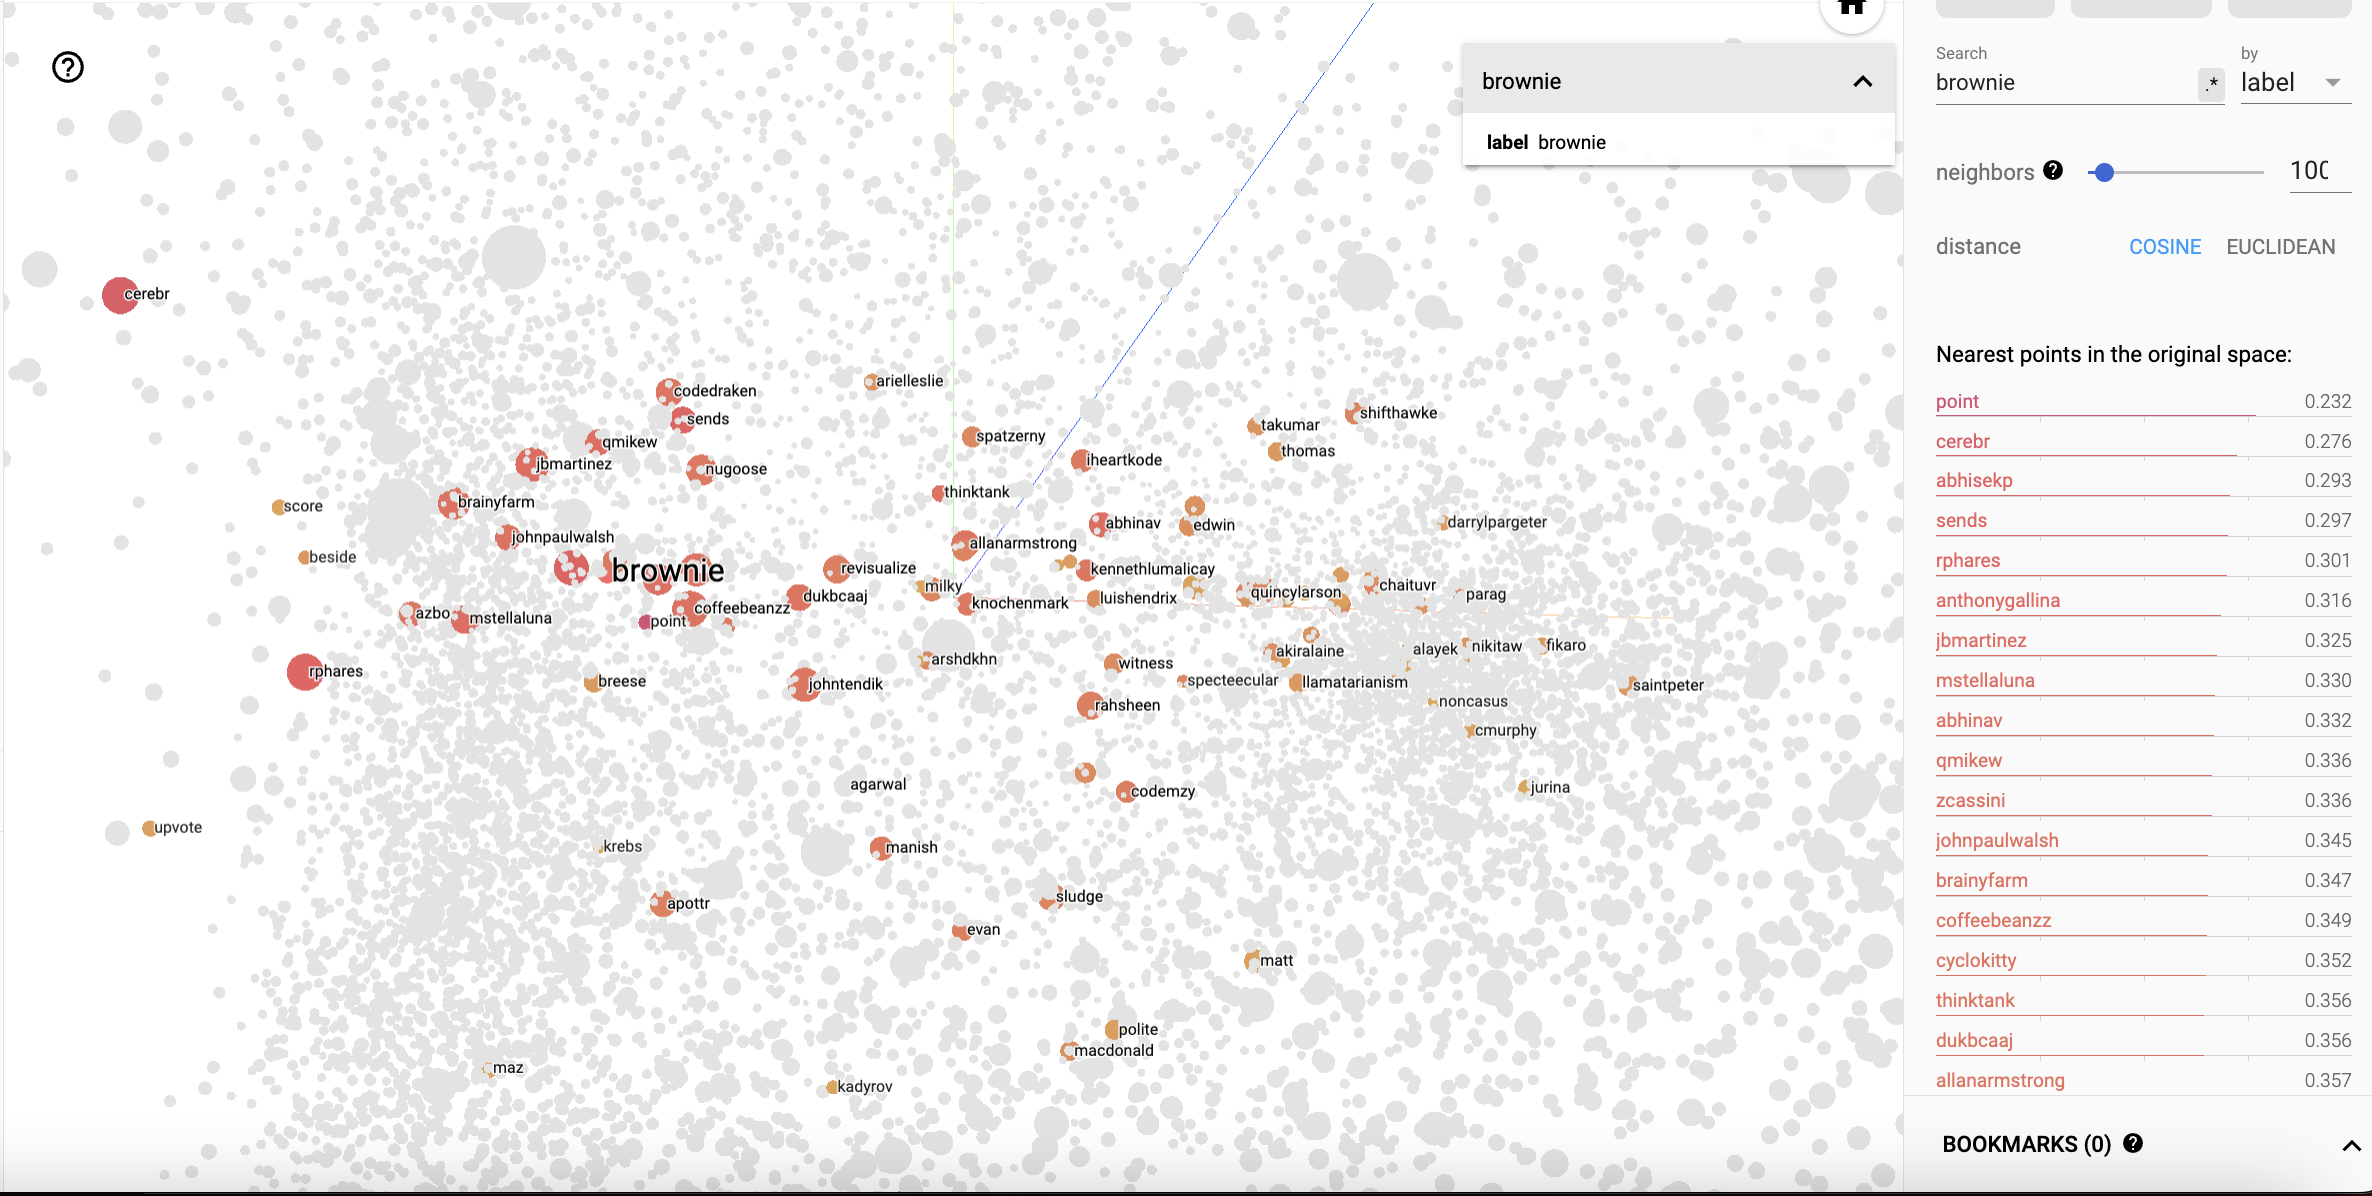

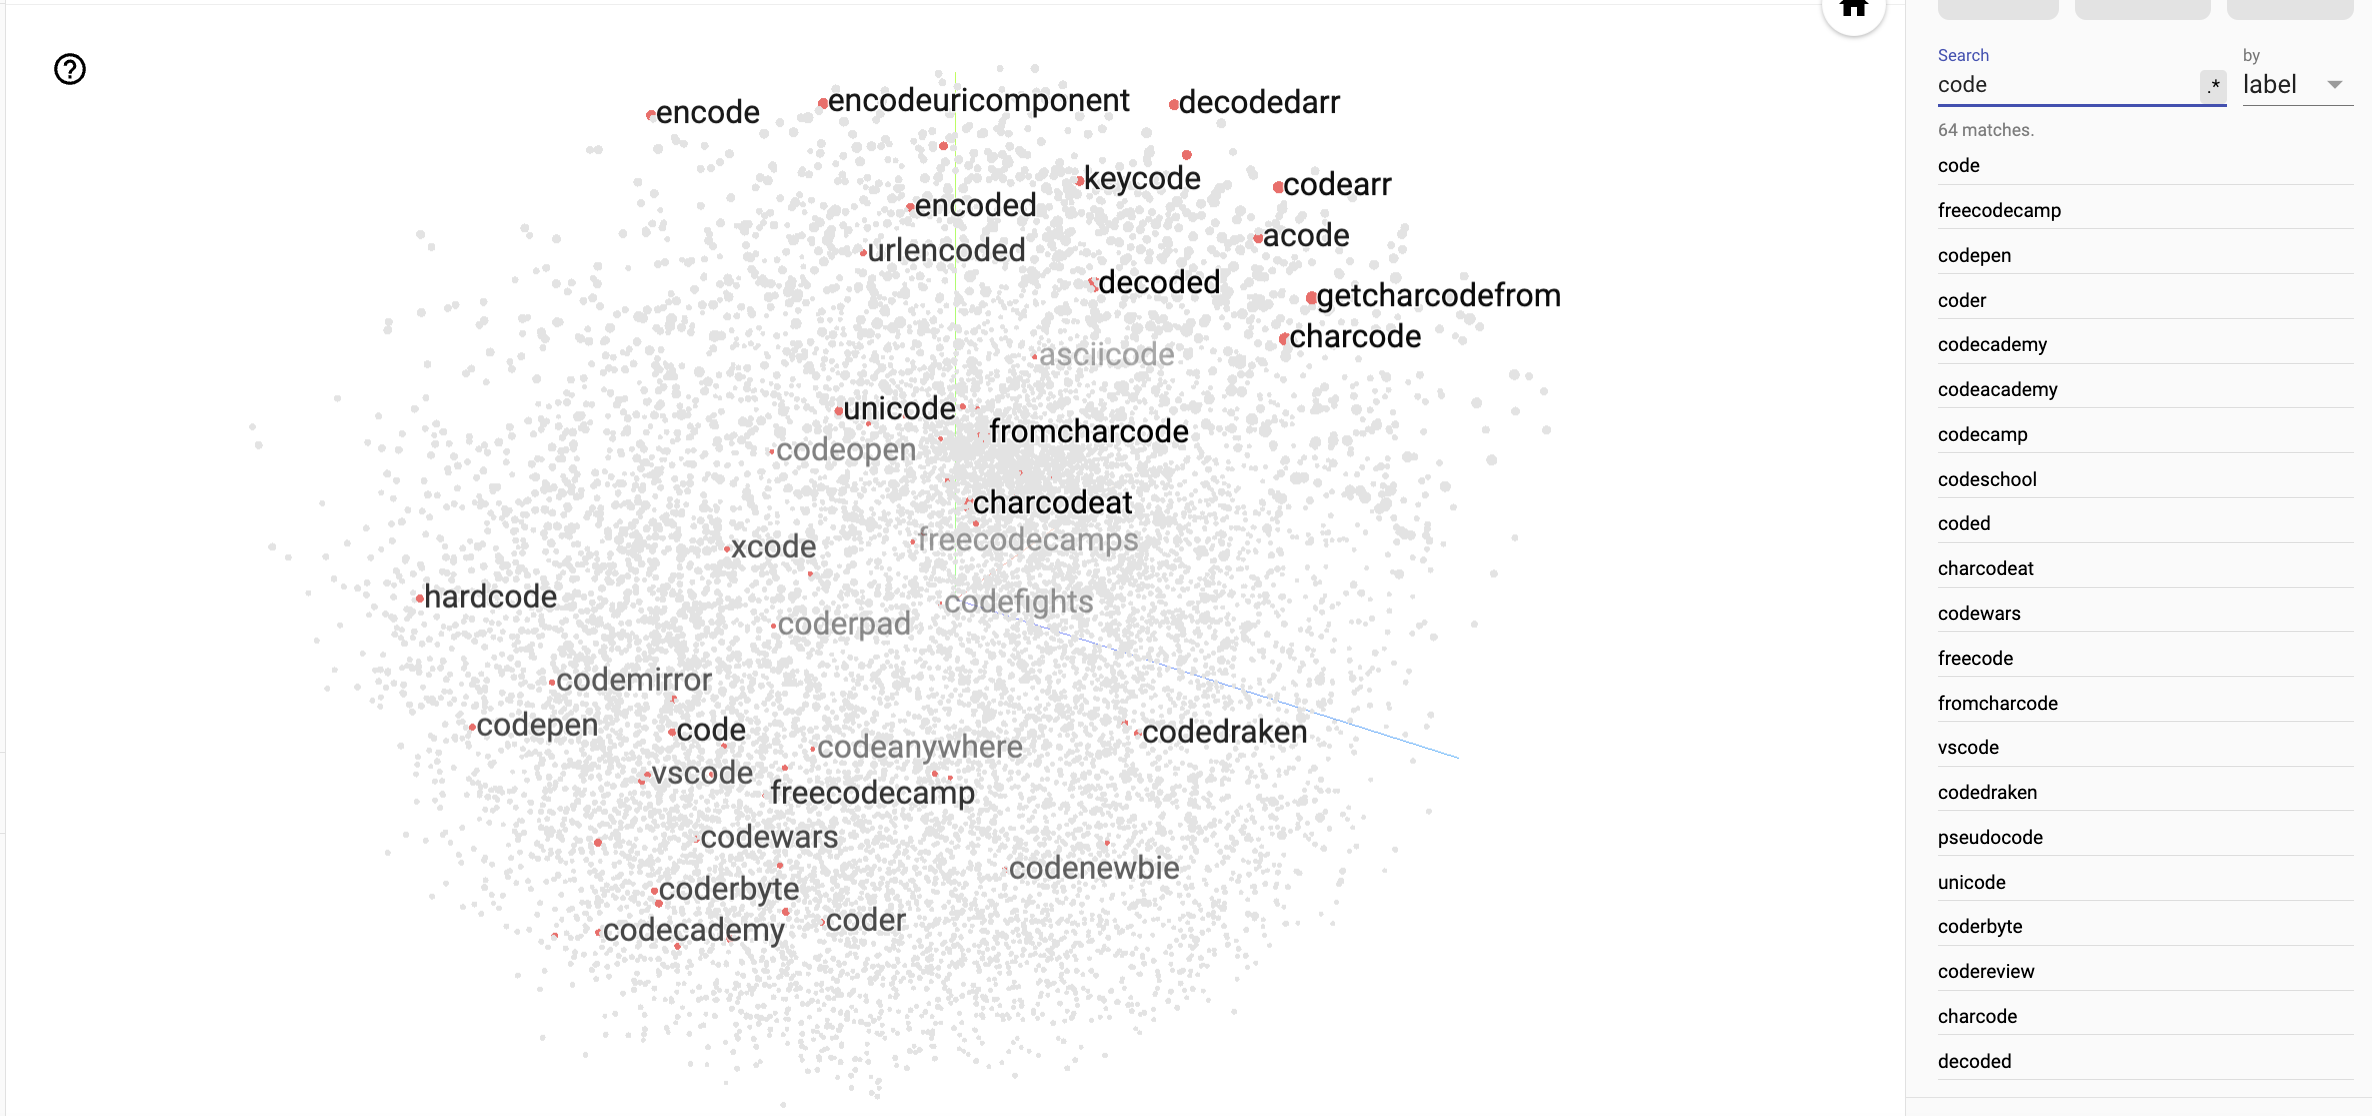

# 2. BERTOPIC

In this step, we will be exploring the BERTopic library, a powerful tool for topic modeling using BERT (Bidirectional Encoder Representations from Transformers). BERTopic leverages the contextual embeddings generated by BERT to identify and extract topics from a given text corpus. By utilizing BERT's deep learning capabilities, BERTopic is able to capture the contextual relationships between words and produce meaningful topic clusters.

Topic modeling is a crucial task in natural language processing and can provide valuable insights into the main themes and discussions within a text dataset. BERTopic offers an advanced approach to topic modeling by incorporating BERT's contextual understanding of words and their surrounding context. By applying BERTopic to our text data, we can uncover hidden patterns, discover important topics, and gain a comprehensive understanding of the content within our corpus.

In this step, we will explore the functionalities of BERTopic, including topic extraction, topic visualization, and topic summarization. By utilizing BERTopic, we can enhance our text analysis workflow and extract valuable information from our text data.

In [6]:
#Data loading
preprocess_clean_freecodecamp_casual = pd.read_csv('preprocess_clean_freecodecamp_casual.csv')

In [7]:
#Check null value
preprocess_clean_freecodecamp_casual['clean_text'].isna().sum()

420407

In [8]:
#Deal with null value
preprocess_clean_freecodecamp_casual = preprocess_clean_freecodecamp_casual.dropna()

In [9]:
#Creating a sample
docs = preprocess_clean_freecodecamp_casual['clean_text'].sample(frac=0.04, random_state=42)


In [ ]:
#Initiate BERTOPIC
topic_model = BERTopic()

#Fit & Transform
topics, probs = topic_model.fit_transform(docs)

In [ ]:
#Visualize topic with my BERT Model
topic_model.visualize_topics()

In [ ]:
#Visualize Barchart
topic_model.visualize_barchart()

In [ ]:
# topic_model.visualize_term_rank()